In [1]:
# 3 Trends

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import seaborn as sb
import tweepy
import numpy as np

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import access_token, consumer_key, consumer_secret, access_token_secret 

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of BBC News
bbc_target_user = "@BBCNews"

# Counter
counter = 1

# Variables for holding sentiments
bbc_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(bbc_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        bbc_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [5]:
# Convert sentiments to DataFrame
bbc_sentiments_df = pd.DataFrame(bbc_sentiments)
bbc_sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sat Mar 31 00:06:21 +0000 2018,1.000,0.000,0.000,1
1,-0.3612,Fri Mar 30 23:38:41 +0000 2018,0.762,0.238,0.000,2
2,-0.3182,Fri Mar 30 23:33:28 +0000 2018,0.813,0.187,0.000,3
3,-0.7650,Fri Mar 30 23:07:07 +0000 2018,0.476,0.524,0.000,4
4,-0.2023,Fri Mar 30 21:10:22 +0000 2018,0.565,0.250,0.185,5


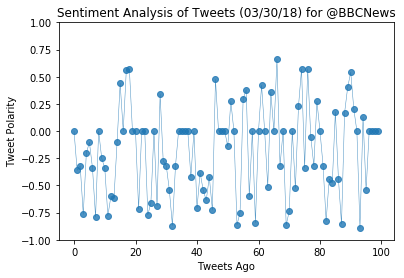

In [6]:
# Create plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment, and +1 the most positive sentiment
# Each plot point reflects the compound sentiment of a tweet
# Sort each plot point by its relative timestamp
plt.plot(np.arange(len(bbc_sentiments_df["Compound"])),
         bbc_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), bbc_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [7]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of CBS News
cbs_target_user = "@CBSNews"

# Counter
counter = 1

# Variables for holding sentiments
cbs_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(cbs_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        cbs_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [8]:
# Convert sentiments to DataFrame
cbs_sentiments_df = pd.DataFrame(cbs_sentiments)
cbs_sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.6249,Sat Mar 31 00:30:00 +0000 2018,0.779,0.000,0.221,1
1,-0.1531,Sat Mar 31 00:10:01 +0000 2018,0.696,0.143,0.161,2
2,0.0000,Fri Mar 30 23:50:01 +0000 2018,1.000,0.000,0.000,3
3,0.3182,Fri Mar 30 23:30:01 +0000 2018,0.881,0.000,0.119,4
4,-0.9325,Fri Mar 30 23:10:01 +0000 2018,0.533,0.467,0.000,5


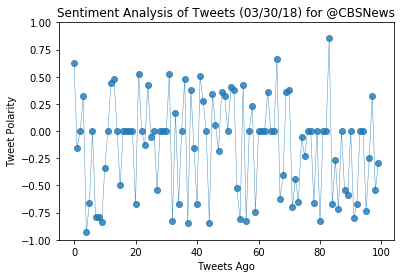

In [9]:
# Set parameters and create CBS plot
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), cbs_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.plot(np.arange(len(cbs_sentiments_df["Compound"])),
         cbs_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

#save plot as png

# Display graph
plt.show()

In [10]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of CNN
cnn_target_user = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
cnn_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(cnn_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        cnn_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [11]:
# Convert sentiments to DataFrame
cnn_sentiments_df = pd.DataFrame(cnn_sentiments)
cnn_sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sat Mar 31 00:34:05 +0000 2018,1.000,0.000,0.000,1
1,0.6808,Sat Mar 31 00:22:11 +0000 2018,0.781,0.000,0.219,2
2,0.4215,Sat Mar 31 00:12:33 +0000 2018,0.877,0.000,0.123,3
3,-0.7783,Sat Mar 31 00:11:53 +0000 2018,0.570,0.430,0.000,4
4,-0.5267,Fri Mar 30 23:56:00 +0000 2018,0.671,0.238,0.091,5


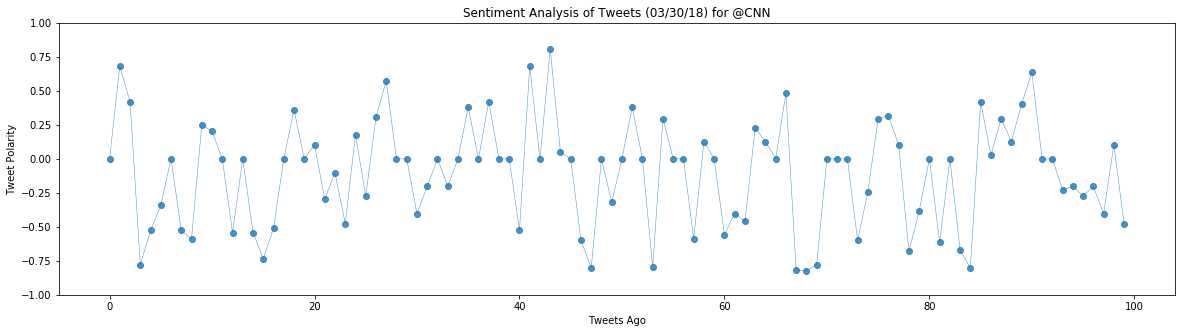

In [20]:
# Set parameters and create CNN plot
plt.figure(figsize=(20,5))
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), cnn_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.plot(np.arange(len(cnn_sentiments_df["Compound"])),
         cnn_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# Save the figure as png image 
plt.savefig("cnn_se.png")

# Display graph
plt.show()

In [13]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of Fox News
fox_target_user = "@FoxNews"

# Counter
counter = 1

# Variables for holding sentiments
fox_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(fox_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        fox_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


In [14]:
# Convert sentiments to DataFrame
fox_sentiments_df = pd.DataFrame(fox_sentiments)
fox_sentiments_df.head()
# Could convert date using date time library

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sat Mar 31 00:42:05 +0000 2018,1.000,0.000,0.000,1
1,-0.7717,Sat Mar 31 00:35:55 +0000 2018,0.621,0.379,0.000,2
2,-0.1027,Sat Mar 31 00:29:30 +0000 2018,0.887,0.113,0.000,3
3,0.0000,Sat Mar 31 00:19:32 +0000 2018,0.433,0.284,0.284,4
4,-0.7096,Sat Mar 31 00:14:44 +0000 2018,0.604,0.396,0.000,5


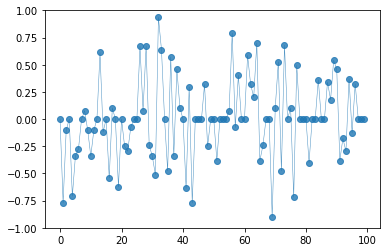

In [15]:
# Fox Plot
plt.ylim(-1,1)
#plt.xlim(,)
#plt.title("")
#plt.xlabel("")
#plt.ylabel("")

plt.plot(np.arange(len(fox_sentiments_df["Compound"])),
         fox_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

plt.show()

In [16]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of New York Times

# Target Account
nyt_target_user = "@NYTimes"

# Counter
counter = 1

# Variables for holding sentiments
nyt_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(fox_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        nyt_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [17]:
# Convert sentiments to DataFrame
nyt_sentiments_df = pd.DataFrame(nyt_sentiments)
nyt_sentiments_df.head()
# Could convert date using date time library

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sat Mar 31 00:42:05 +0000 2018,1.000,0.000,0.000,1
1,-0.7717,Sat Mar 31 00:35:55 +0000 2018,0.621,0.379,0.000,2
2,-0.1027,Sat Mar 31 00:29:30 +0000 2018,0.887,0.113,0.000,3
3,0.0000,Sat Mar 31 00:19:32 +0000 2018,0.433,0.284,0.284,4
4,-0.7096,Sat Mar 31 00:14:44 +0000 2018,0.604,0.396,0.000,5


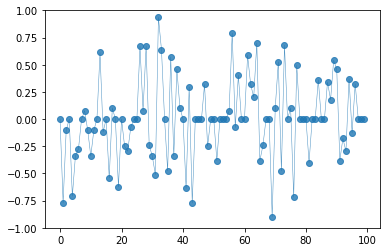

In [18]:
# NYT Plot
plt.ylim(-1,1)
#plt.xlim(,)
#plt.title("")
#plt.xlabel("")
#plt.ylabel("")

plt.plot(np.arange(len(nyt_sentiments_df["Compound"])),
         nyt_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

plt.show()